In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [12]:

av_same = {}
running_av_same = {}
same_loss = {}
same_gain = {}

for num_civs,backend in [(53,'rochester'),(53,'depolarized'),(5,'simulator'),(5,'depolarized')]:
    
    print(num_civs,backend)

    # get a list of folder names containing the samples
    samples = []
    folders = [info for info in os.fwalk('maps')][0][1]
    for folder in folders:
        (n,b,t) = folder.split('_')
        if n==str(num_civs) and b==backend:
            samples.append(folder)
    num_samples = len(samples)
    
    
    sames = []
    same_loss[num_civs,backend] = 0
    same_gain[num_civs,backend] = 0

    for sample in samples:

        with open('maps/'+sample+'/data.txt', 'r') as file:
            data = file.readlines()

        moves = []
        transfers = []
        years = 0
        for dump in data:
            dump = eval(dump)
            moves.append(dump['moves'])
            transfers.append(dump['transfers'])
            years += 1

        same = []
        for year in range(0,years-1):
            same.append(0)
            num_civs = len(moves[year])
            for civ in moves[year]:
                same[-1] += (moves[year][civ][0]==moves[year+1][civ][0])/num_civs            
        sames.append(same)   
        
        sl = 0
        sg = 0
        N = 0
        for year in range(int(years/2),years-1):
            for (loser,winner,city) in transfers[year]:
                N += 1
                sl += (moves[year][loser][0]==moves[year+1][loser][0])
                sg += (moves[year][winner][0]==moves[year+1][winner][0])
        if N>0:
            same_loss[num_civs,backend] += sl/(N*num_samples)
            same_gain[num_civs,backend] += sg/(N*num_samples)
 
    running_av_same[num_civs,backend] = [0 for _ in range(years-1)]
    for same in sames:
        for year in range(0,years-1):
            running_av_same[num_civs,backend][year] += same[year]/num_samples
            
    av_same[num_civs,backend] = np.mean(running_av_same[num_civs,backend][int(years/2):years-1])

53 rochester
53 depolarized
5 simulator
5 depolarized


In [13]:
av_same

{(53, 'rochester'): 0.3703703703703704,
 (53, 'depolarized'): 0.3302363255193444,
 (5, 'simulator'): 0.6984126984126985,
 (5, 'depolarized'): 0.3209876543209876}

In [14]:
same_loss

{(53, 'rochester'): 0.33604515139590146,
 (53, 'depolarized'): 0.32896578447941727,
 (5, 'simulator'): 0.6015535435500942,
 (5, 'depolarized'): 0.324728372550239}

In [15]:
same_gain

{(53, 'rochester'): 0.4426665154507763,
 (53, 'depolarized'): 0.32572964445947034,
 (5, 'simulator'): 0.66693205563777,
 (5, 'depolarized'): 0.3348163884497592}

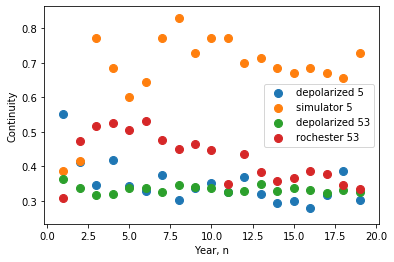

In [16]:
x_axis = range(1,years)

ax = plt.gca()
plt.xlabel('Year, n')
plt.ylabel('Continuity')
ax.scatter( x_axis, running_av_same[5,'depolarized'], label='depolarized 5', s=64)
ax.scatter( x_axis, running_av_same[5,'simulator'], label='simulator 5', s=64)
ax.scatter( x_axis, running_av_same[53,'depolarized'], label='depolarized 53', s=64)
ax.scatter( x_axis, running_av_same[53,'rochester'], label='rochester 53', s=64)
plt.legend()

plt.show()

In [7]:
running_av_same[53,'rochester']

[0.3081761006289308,
 0.4716981132075471,
 0.5157232704402516,
 0.5251572327044025,
 0.5062893081761006,
 0.5314465408805031,
 0.47484276729559743,
 0.4496855345911949,
 0.4654088050314465,
 0.4465408805031446,
 0.3490566037735849,
 0.43396226415094336,
 0.38364779874213834,
 0.3584905660377358,
 0.36477987421383645,
 0.38679245283018865,
 0.3773584905660377,
 0.34591194968553457,
 0.3333333333333333]

In [8]:
from qiskit import IBMQ
IBMQ.load_account()
for potential_provider in IBMQ.providers():
    for potential_backend in potential_provider.backends():
        if potential_backend.name()=='ibmq_rochester':
            provider = potential_provider
            backend = potential_backend

In [9]:
job = backend.jobs()[0]

In [10]:
for data in job.qobj().to_dict()['experiments']:
    print(data['header']['name'])

('X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X')
('Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y')
('Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z')
('X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', '